- Key Features:
   - CustomerID: 고객번호. Unique identifier for each customer
   - Churn: 탈퇴여부(유지=0, 탈퇴=1). Target variable indicating whether a customer has churned (1) or not (0)
   - Tenure: 가입기간(월). Duration of customer's relationship with the platform
   - PreferredLoginDevice: 메인주문매체. Customer's preferred device for logging in
   - CityTier: 고객도시등급. Classification of the city the customer lives in
   - WarehouseToHome: 주소거리(km). Distance from the customer's home to the nearest warehouse
   - PreferredPaymentMode: 메인결제수단. Customer's preferred payment method
   - Gender: 성별. Customer's gender
   - HourSpendOnApp: 앱사용시간(시간). Average time spent on the app
   - NumberOfDeviceRegistered: 디바이스등록수. Number of devices registered by the customer
   - PreferedOrderCat: 선호주문카테고리. Preferred product category
   - SatisfactionScore: 만족도. Customer satisfaction rating
   - MaritalStatus: 결혼여부. Customer's marital status
   - NumberOfAddress: 주소저장수. Number of addresses saved by the customer
   - Complain: 불만제기여부. Whether the customer has made a complaint
   - OrderAmountHikeFromlastYear: 전년대비주문금액증가율. Percentage increase in order amount from the previous year
   - CouponUsed: 쿠폰사용수. Number of coupons used by the customer
   - OrderCount: 총주문건수. Total number of orders placed
   - DaySinceLastOrder: 최근주문일수. Number of days since the last order
   - CashbackAmount: 캐시백금액. Total cashback amount received by the customer

In [2]:
import pandas as pd

data_path = 'C:/Users/Admin/Desktop/삼정/2nd_project/data'

data = pd.read_csv(data_path + '/E-Commerce Churn Data.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

- 데이터 정보 분석 결과
   - 총 데이터 수: 5630행, 20열
   - 결측치 존재: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder 컬럼에 결측치가 존재.
   - 데이터 유형:
     - 수치형: 15개 (float64: 7개, int64: 8개)
     - 범주형: 5개 (object)

In [4]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [5]:
# 결측치 분석
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_report[missing_report['Missing Values'] > 0])

                             Missing Values  Percentage
Tenure                                  264    4.689165
WarehouseToHome                         251    4.458259
HourSpendOnApp                          255    4.529307
OrderAmountHikeFromlastYear             265    4.706927
CouponUsed                              256    4.547069
OrderCount                              258    4.582593
DaySinceLastOrder                       307    5.452931


In [6]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


- 데이터 분포 및 특성
1. 이탈 고객 비율:
    - 전체 고객 중 약 16.8%가 이탈. 클래스 불균형 가능성 존재.
2. 가입 기간(Tenure): 
    - 가입 기간이 짧은 고객이 많음(25%가 1개월 이하).
    - 초기 고객 유지가 중요한 문제로 보임.
3. 도시 등급 및 거리:
    - 평균적으로 1등급 도시(대도시)에 거주하는 고객이 많으며, 창고에서 집까지 거리는 평균 15km.
4. 만족도 및 주문 관련 데이터:
    - 만족도가 중간 수준이며, 대부분의 고객이 적은 주문 수와 쿠폰 사용을 보임.
    - 전년도 대비 주문 금액 증가율이 높은 고객이 일부 존재.

Churn 분포 (%):
0    83.161634
1    16.838366
Name: Churn, dtype: float64


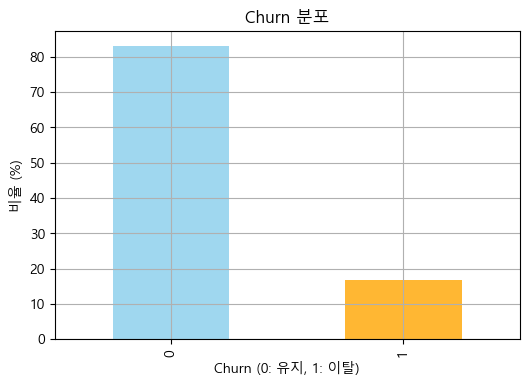

In [28]:
# Churn 변수 분포 확인
churn_counts = data['Churn'].value_counts(normalize=True) * 100
print("Churn 분포 (%):")
print(churn_counts)

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
plt.title("Churn 분포")
plt.xlabel("Churn (0: 유지, 1: 이탈)")
plt.ylabel("비율 (%)")
plt.grid(True)
plt.show()


고객 이탈 (`Churn`) 변수의 불균형 상태를 보여줍니다. **약 16.8%의 고객이 이탈**하고, **83.1%의 고객이 유지**되었습니다.

---

### **분석 및 전처리 필요 사항**

1. **데이터 불균형 문제**
   - 이탈 고객과 유지 고객 간 비율 차이가 큽니다.
   - 학습 데이터가 불균형할 경우, 모델이 다수 클래스(유지 고객)에 편향될 가능성이 있습니다.

   **해결 방법**:
   - **샘플링**:
     - 소수 클래스(이탈 고객)를 증강하는 **Oversampling (예: SMOTE)**.
     - 다수 클래스(유지 고객)를 감소시키는 **Undersampling**.
   - **클래스 가중치 조정**:
     - 모델 학습 시 소수 클래스에 높은 가중치를 부여하여 균형을 맞춤.


# 범주형 변수 시각화 및 분석

In [25]:
# 범주형 변수의 고유값 확인
# 범주형 변수들이 예상한 값 범위 내에 있는지 확인합니다. 예를 들어, Gender, PreferredPaymentMode 등에서 이상한 값이나 입력 오류가 있는지 점검
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
for col in categorical_columns:
    print(f"{col}의 고유값:", data[col].unique())

PreferredLoginDevice의 고유값: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode의 고유값: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender의 고유값: ['Female' 'Male']
PreferedOrderCat의 고유값: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus의 고유값: ['Single' 'Divorced' 'Married']


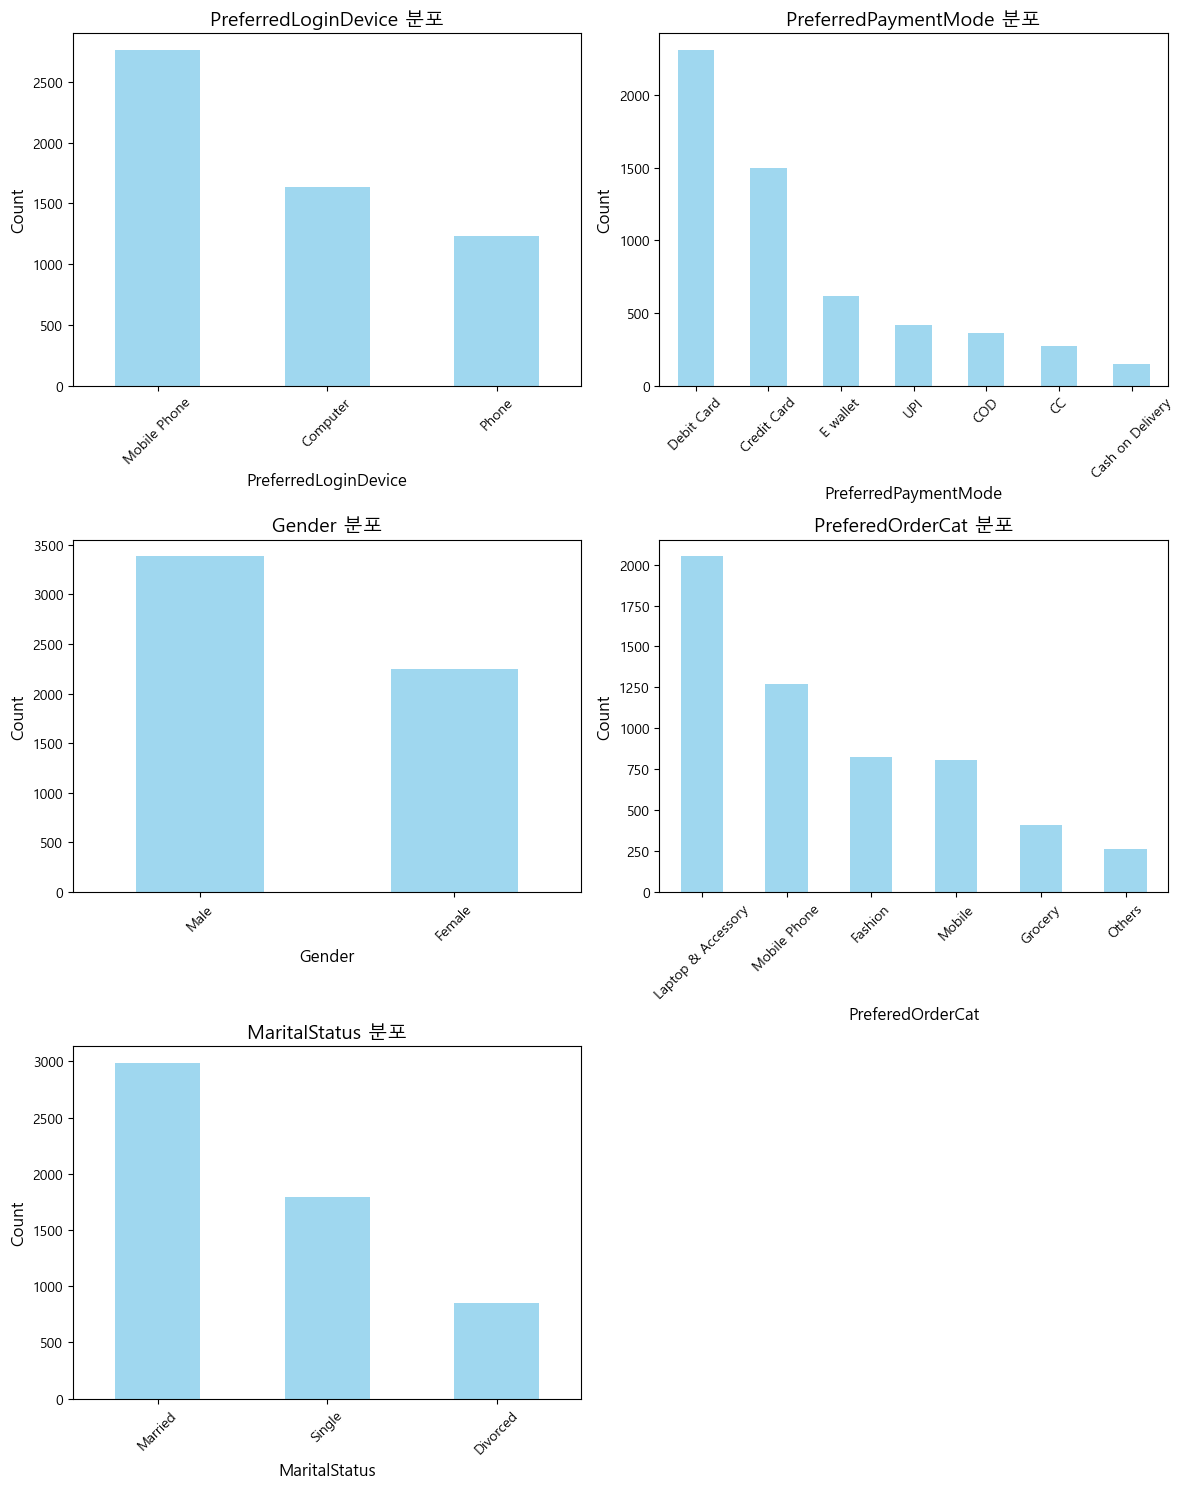

PreferredLoginDevice: 모바일 장치가 주요 로그인 방법일 가능성이 높습니다.
PreferredPaymentMode: 가장 많이 사용되는 결제 방법은 특정 방식(예: 카드, UPI 등)이 우세할 것으로 예상됩니다.
Gender: 성별 분포가 균등하지 않을 수 있으며, 특정 성별이 더 높은 비율을 차지할 가능성이 있습니다.
PreferedOrderCat: 주문 카테고리 분포를 통해 특정 제품군(예: 전자 제품, 모바일 액세서리 등)의 선호도가 높음을 확인할 수 있습니다.
MaritalStatus: 기혼 여부에 따라 고객의 쇼핑 행동 차이가 나타날 가능성이 있습니다.


In [9]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 3행 2열로 차트 구성
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

# Categorical columns identified earlier
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# 범주형 변수 분포 시각화 및 분석
for i, col in enumerate(categorical_columns):
    value_counts = data[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[i], color='skyblue', alpha=0.8)
    axes[i].set_title(f"{col} 분포", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# 마지막 빈 서브플롯 제거
fig.delaxes(axes[-1])

# 그래프 표시
plt.tight_layout()
plt.show()

# 분석 결과 요약
categorical_analysis = {
    "PreferredLoginDevice": "모바일 장치가 주요 로그인 방법일 가능성이 높습니다.",
    "PreferredPaymentMode": "가장 많이 사용되는 결제 방법은 특정 방식(예: 카드, UPI 등)이 우세할 것으로 예상됩니다.",
    "Gender": "성별 분포가 균등하지 않을 수 있으며, 특정 성별이 더 높은 비율을 차지할 가능성이 있습니다.",
    "PreferedOrderCat": "주문 카테고리 분포를 통해 특정 제품군(예: 전자 제품, 모바일 액세서리 등)의 선호도가 높음을 확인할 수 있습니다.",
    "MaritalStatus": "기혼 여부에 따라 고객의 쇼핑 행동 차이가 나타날 가능성이 있습니다."
}

# 분석 결과 출력
for key, value in categorical_analysis.items():
    print(f"{key}: {value}")


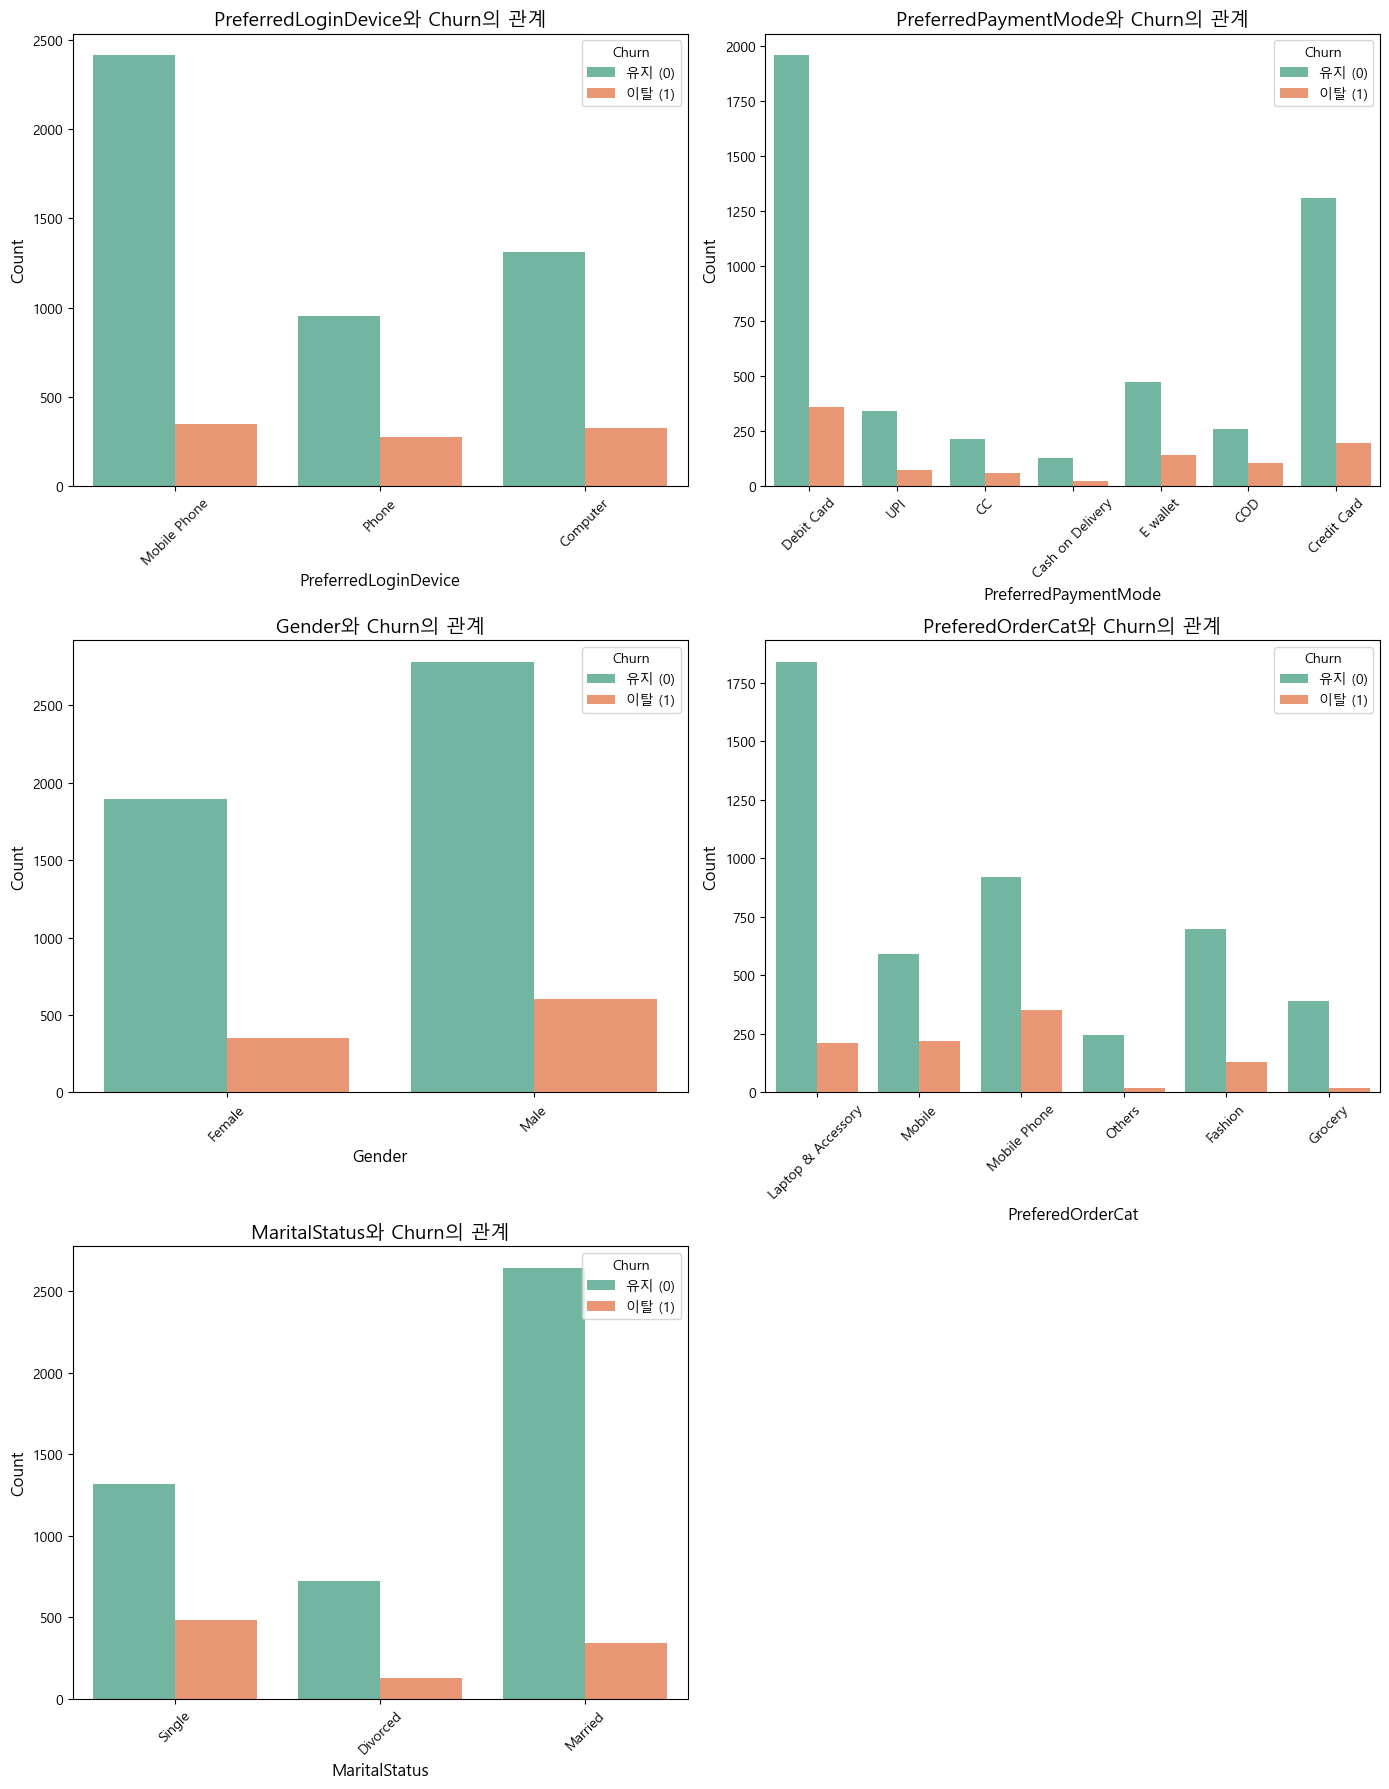

In [11]:
import seaborn as sns

# 3행 2열로 차트 수정
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()

# 범주형 변수와 Churn 간 관계 시각화
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Churn', data=data, palette='Set2', ax=axes[i])
    axes[i].set_title(f"{col}와 Churn의 관계", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title="Churn", loc='upper right', labels=['유지 (0)', '이탈 (1)'])

# 마지막 빈 서브플롯 제거 (6개의 서브플롯이 채워지지 않을 경우 대비)
if len(categorical_columns) < len(axes):
    for j in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[j])

# 레이아웃 조정
plt.tight_layout()
plt.show()

- 주요 분석 결과 요약
1. PreferredLoginDevice와 Churn:
    - 모바일 사용자가 주요 로그인 방법으로 확인되며, 이탈률은 비교적 낮을 수 있습니다.
2. PreferredPaymentMode와 Churn:
    - 특정 결제 방식(예: 카드 또는 UPI)이 이탈률에 영향을 미칠 가능성이 있습니다.
3. Gender와 Churn:
    - 특정 성별에서 이탈률이 더 높거나 낮을 수 있으며, 성별별 특성을 추가 분석해야 합니다.
4. PreferedOrderCat와 Churn:
    - 특정 주문 카테고리를 선호하는 고객의 이탈률이 더 높을 가능성이 있습니다.
5. MaritalStatus와 Churn:
    - 기혼 여부에 따른 이탈률 차이가 보이며, 기혼자와 미혼자의 구매 행동에 차이가 있을 수 있습니다.

# 이상치 탐색 및 수치형 변수 시각화 및 분석

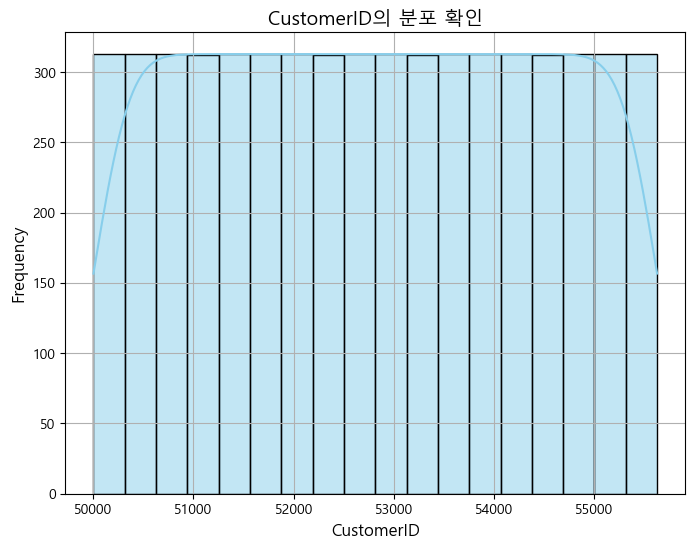

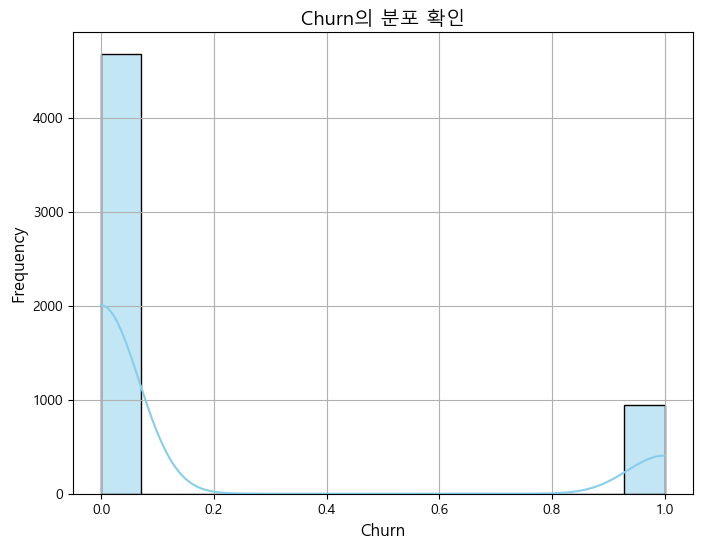

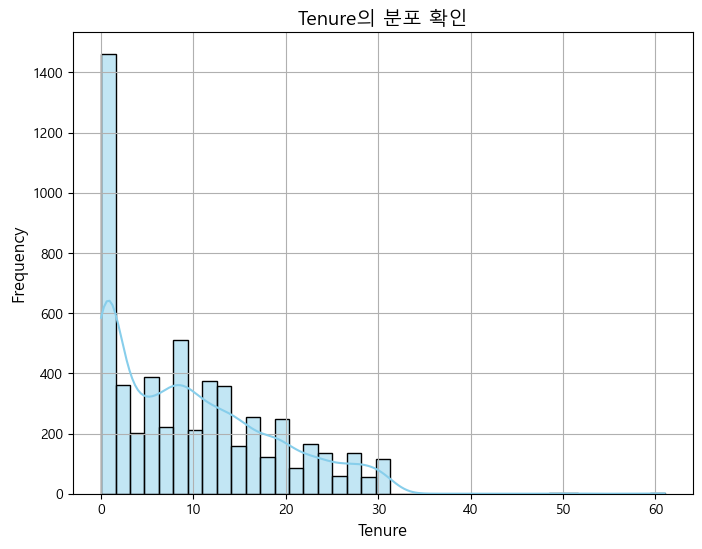

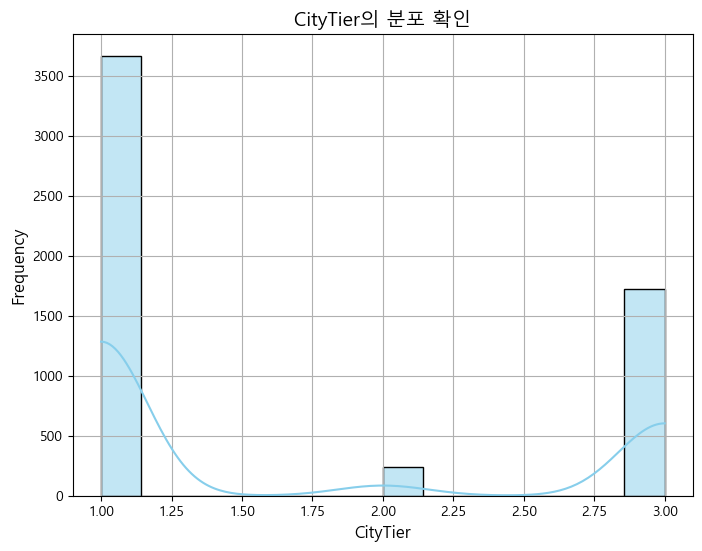

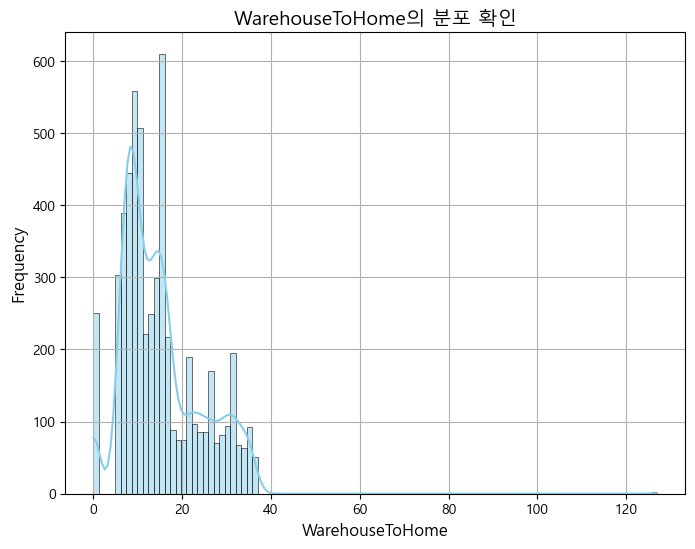

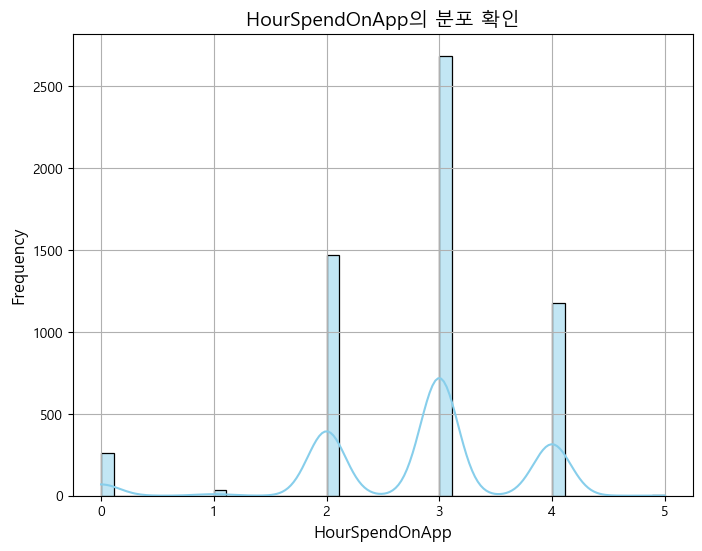

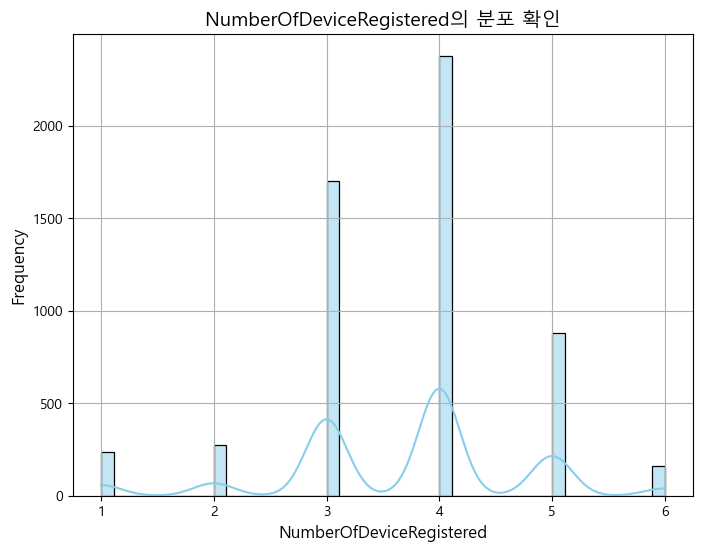

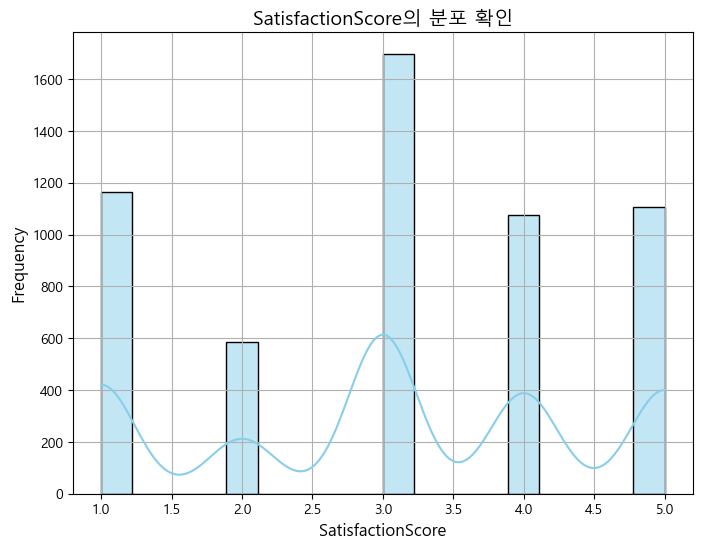

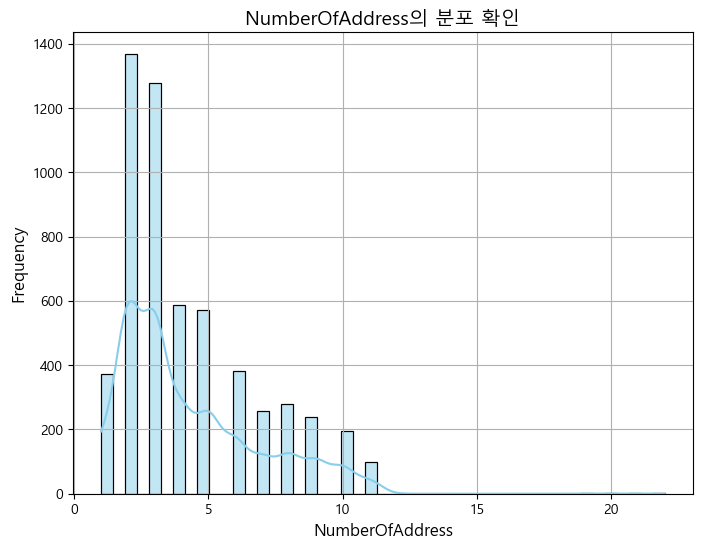

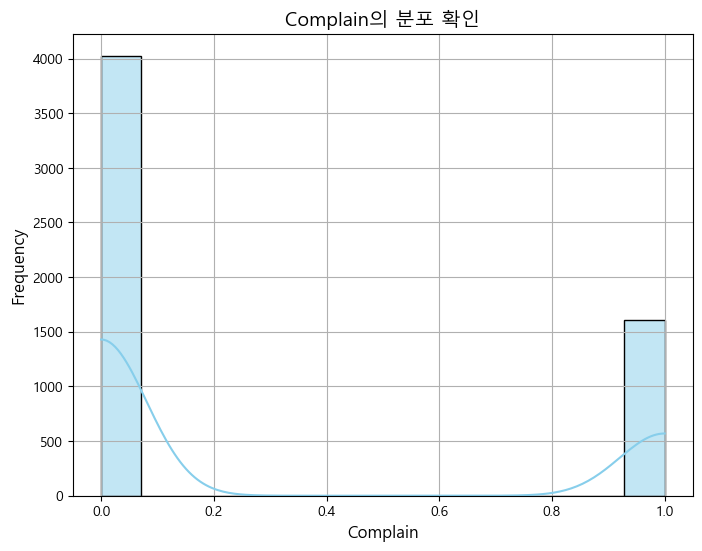

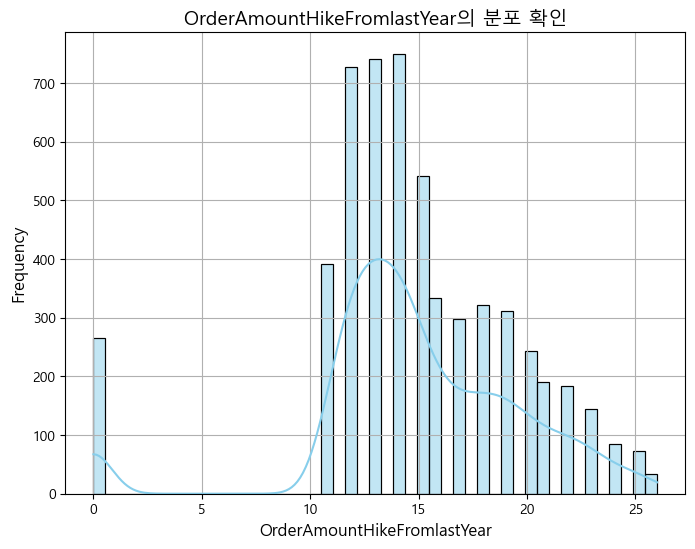

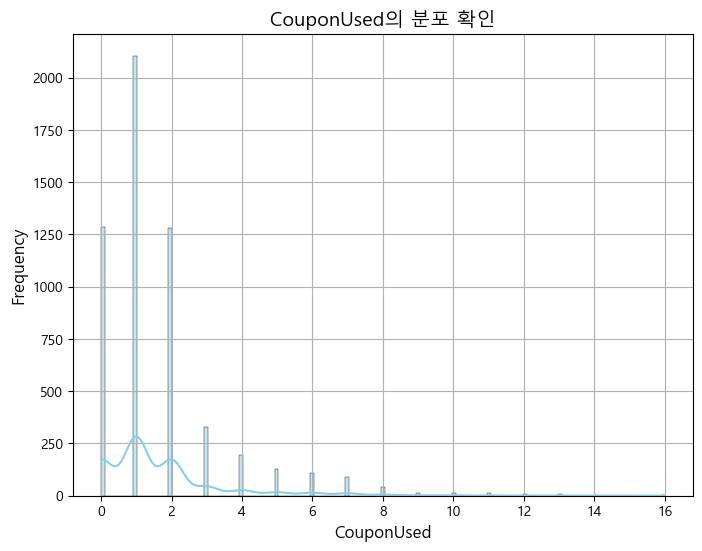

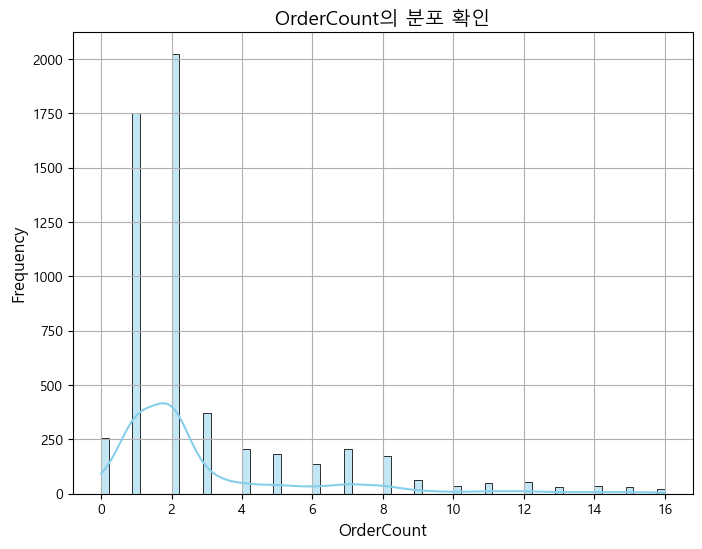

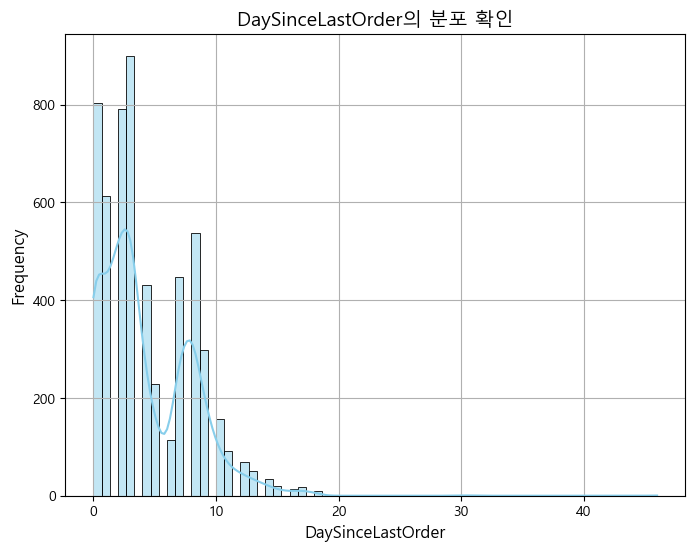

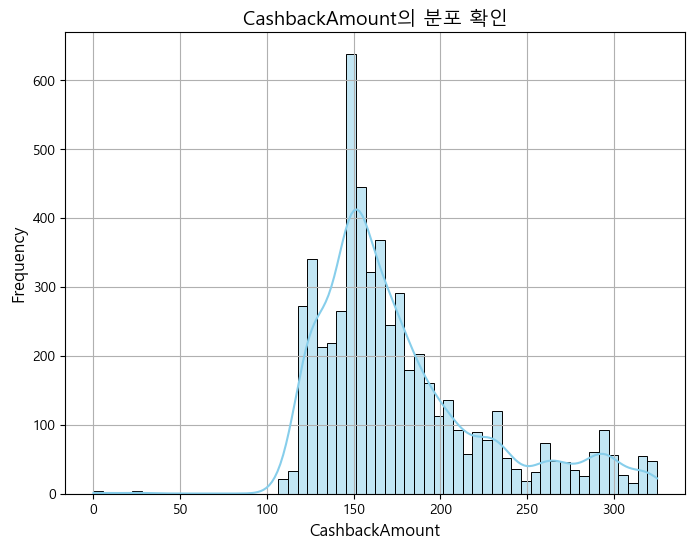

In [26]:
# 수치형 변수의 분포 확인
# 수치형 변수들이 실제로 적절한 범위 내에 있는지 확인하고, 이상치가 존재하는지 시각적으로 확인합니다. 예를 들어, OrderAmountHikeFromlastYear, DaySinceLastOrder 등에서 비현실적인 값이 있는지 체크
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f"{col}의 분포 확인", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()

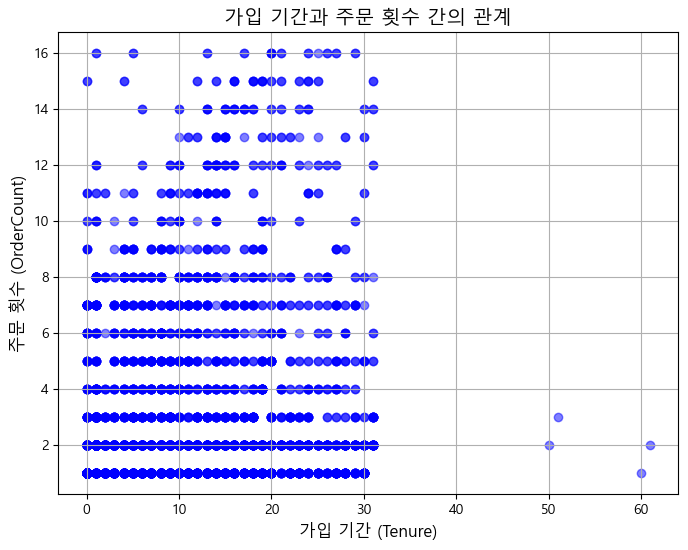

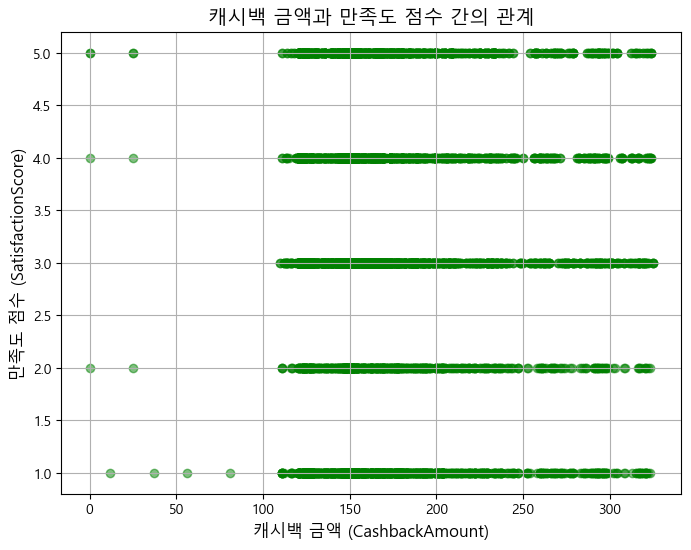

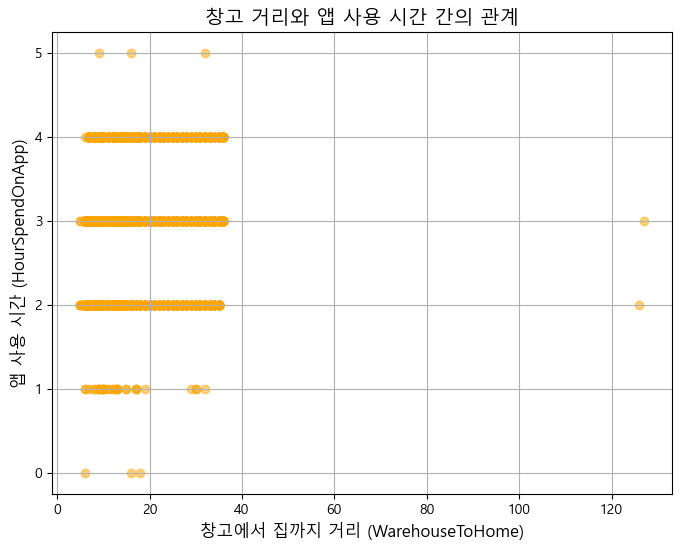

In [14]:
# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 산점도: Tenure와 OrderCount 간의 관계
plt.figure(figsize=(8, 6))
plt.scatter(data['Tenure'], data['OrderCount'], alpha=0.5, c='blue')
plt.title("가입 기간과 주문 횟수 간의 관계", fontsize=14)
plt.xlabel("가입 기간 (Tenure)", fontsize=12)
plt.ylabel("주문 횟수 (OrderCount)", fontsize=12)
plt.grid(True)
plt.show()

# 산점도: CashbackAmount와 SatisfactionScore 간의 관계
plt.figure(figsize=(8, 6))
plt.scatter(data['CashbackAmount'], data['SatisfactionScore'], alpha=0.5, c='green')
plt.title("캐시백 금액과 만족도 점수 간의 관계", fontsize=14)
plt.xlabel("캐시백 금액 (CashbackAmount)", fontsize=12)
plt.ylabel("만족도 점수 (SatisfactionScore)", fontsize=12)
plt.grid(True)
plt.show()

# 산점도: WarehouseToHome와 HourSpendOnApp 간의 관계
plt.figure(figsize=(8, 6))
plt.scatter(data['WarehouseToHome'], data['HourSpendOnApp'], alpha=0.5, c='orange')
plt.title("창고 거리와 앱 사용 시간 간의 관계", fontsize=14)
plt.xlabel("창고에서 집까지 거리 (WarehouseToHome)", fontsize=12)
plt.ylabel("앱 사용 시간 (HourSpendOnApp)", fontsize=12)
plt.grid(True)
plt.show()


### 산점도 분석 결과

#### **1. 가입 기간(Tenure)과 주문 횟수(OrderCount) 간의 관계**
- **특성**:
  - 가입 기간(Tenure)은 고객이 쇼핑몰에 머문 기간을 나타내며, 주문 횟수(OrderCount)는 쇼핑몰에서의 활동 빈도를 나타냅니다.
  - 일반적으로, 가입 기간이 길수록 주문 횟수가 증가할 가능성이 예상됩니다.

- **분석**:
  - 산점도에서 **가입 초기(짧은 Tenure)**에 주문 횟수가 적은 고객이 많음을 확인할 수 있습니다.
  - 하지만, 가입 기간이 길어도 일부 고객의 주문 횟수는 낮은 수준에 머무르고 있습니다. 이는 고객의 활성도와 이탈 가능성을 탐구해야 할 필요성을 보여줍니다.

---

#### **2. 캐시백 금액(CashbackAmount)과 만족도 점수(SatisfactionScore) 간의 관계**
- **특성**:
  - 캐시백 금액은 고객에게 제공된 혜택을, 만족도 점수는 고객 경험에 대한 평가를 나타냅니다.
  - 일반적으로 캐시백 금액이 높을수록 만족도 점수가 증가할 것으로 예상됩니다.

- **분석**:
  - **캐시백 금액이 낮은 구간**에서도 높은 만족도 점수를 기록한 고객이 일부 존재합니다. 이는 캐시백 이외의 요소(예: 서비스 품질, 배송 속도)가 만족도에 영향을 미쳤을 가능성을 시사합니다.
  - 반대로 캐시백 금액이 높아도 낮은 만족도를 보이는 고객은 추가 분석이 필요합니다(예: 특정 불만족 사유).

---

#### **3. 창고에서 집까지 거리(WarehouseToHome)와 앱 사용 시간(HourSpendOnApp) 간의 관계**
- **특성**:
  - 창고에서 집까지 거리(WarehouseToHome)는 배송 시간과 편리성에 영향을 미칠 수 있으며, 앱 사용 시간(HourSpendOnApp)은 고객의 디지털 참여도를 나타냅니다.
  - 일반적으로 거리가 멀어질수록 배송 시간이 길어져 앱 사용 시간이 증가하거나 감소할 가능성이 있습니다.

- **분석**:
  - 산점도에서 특정 거리 구간(예: 중간 거리)에서 앱 사용 시간이 높은 고객이 관찰됩니다.
  - 창고와 고객 간 거리가 매우 짧거나 멀 경우, 앱 사용 시간이 낮아지는 경향이 있습니다. 이는 중간 거리의 고객이 배송 추적 등에 앱을 더 자주 사용할 가능성을 보여줍니다.

---

### 종합 인사이트
1. **Tenure와 OrderCount**:
   - 초기 고객의 활성도를 높이는 전략(예: 환영 쿠폰 제공)이 중요합니다.
   - 장기 고객의 비활성화 문제를 해결하기 위해 재활성화 캠페인(예: 개인화된 할인)을 검토해야 합니다.

2. **CashbackAmount와 SatisfactionScore**:
   - 캐시백 외에도 만족도에 영향을 미치는 요인을 파악하여 개선할 필요가 있습니다.
   - 캐시백이 높은 고객 중 낮은 만족도를 보이는 사례는 불만족 요인을 확인해야 합니다.

3. **WarehouseToHome와 HourSpendOnApp**:
   - 중간 거리의 고객을 대상으로 디지털 경험을 강화하는 전략을 검토해야 합니다.
   - 배송 거리와 앱 사용 간의 상관성을 심화 분석하여 물류 최적화를 고려할 수 있습니다.

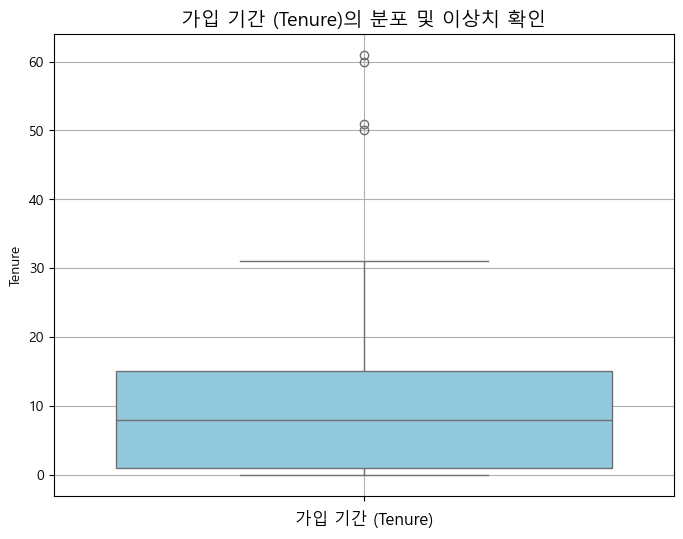

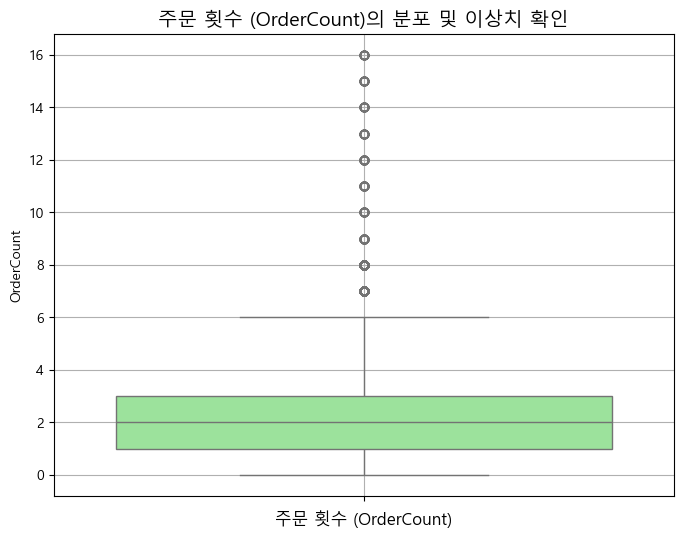

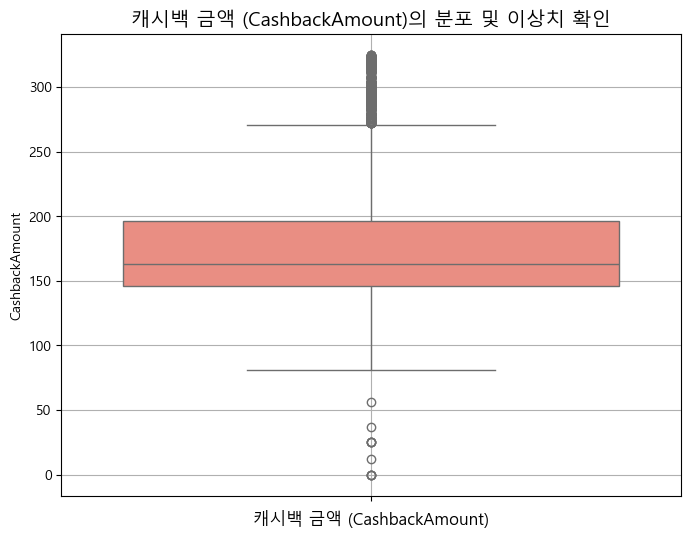

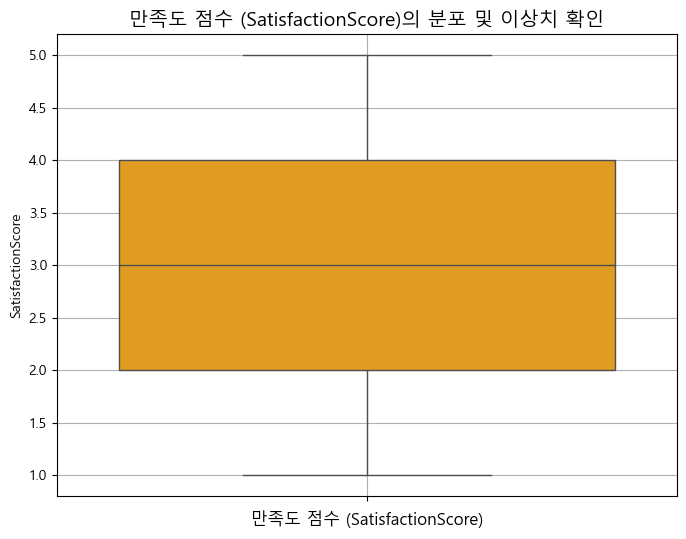

In [15]:
# Re-importing necessary libraries and reloading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# Replace missing values with 0
data.fillna(0, inplace=True)

# 박스플롯: Tenure (가입 기간)
plt.figure(figsize=(8, 6))
sns.boxplot(data['Tenure'], color='skyblue')
plt.title("가입 기간 (Tenure)의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("가입 기간 (Tenure)", fontsize=12)
plt.grid(True)
plt.show()

# 박스플롯: OrderCount (주문 횟수)
plt.figure(figsize=(8, 6))
sns.boxplot(data['OrderCount'], color='lightgreen')
plt.title("주문 횟수 (OrderCount)의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("주문 횟수 (OrderCount)", fontsize=12)
plt.grid(True)
plt.show()

# 박스플롯: CashbackAmount (캐시백 금액)
plt.figure(figsize=(8, 6))
sns.boxplot(data['CashbackAmount'], color='salmon')
plt.title("캐시백 금액 (CashbackAmount)의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("캐시백 금액 (CashbackAmount)", fontsize=12)
plt.grid(True)
plt.show()

# 박스플롯: SatisfactionScore (만족도 점수)
plt.figure(figsize=(8, 6))
sns.boxplot(data['SatisfactionScore'], color='orange')
plt.title("만족도 점수 (SatisfactionScore)의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("만족도 점수 (SatisfactionScore)", fontsize=12)
plt.grid(True)
plt.show()


In [18]:
# Re-importing necessary libraries and reloading the dataset
import pandas as pd
import numpy as np

# Replace missing values with 0
data.fillna(0, inplace=True)

# IQR 방식 이상치 탐지 함수
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Z-score 방식 이상치 탐지 함수
def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[np.abs(z_scores) > threshold]
    return outliers, z_scores

# 변수별 이상치 탐지 결과 저장
columns_to_check = ['Tenure', 'OrderCount', 'CashbackAmount', 'SatisfactionScore']
results = {}

for column in columns_to_check:
    iqr_outliers, iqr_lower, iqr_upper = detect_outliers_iqr(data, column)
    zscore_outliers, z_scores = detect_outliers_zscore(data, column)

    results[column] = {
        "IQR_Outliers": iqr_outliers.shape[0],
        "IQR_Bounds": (iqr_lower, iqr_upper),
        "ZScore_Outliers": zscore_outliers.shape[0],
        "ZScore_Threshold": 3
    }

# Display results
outlier_summary = pd.DataFrame(results).T
print(outlier_summary)

                  IQR_Outliers     IQR_Bounds ZScore_Outliers ZScore_Threshold
Tenure                       4  (-20.0, 36.0)               4                3
OrderCount                 703    (-2.0, 6.0)             176                3
CashbackAmount             447  (71.0, 271.0)              13                3
SatisfactionScore            0    (-1.0, 7.0)               0                3


### 이상치 탐지 결과 분석

#### **1. Tenure (가입 기간)**

- **IQR 방식**:
  - 경계값: `(-20.0, 36.0)`
  - 이상치 개수: **4**
  - 가입 기간은 음수가 불가능하므로 하한값보다 작은 데이터는 없으며, 상한값(36)을 초과한 값이 이상치로 분류되었습니다.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우 이상치로 간주.
  - 이상치 개수: **4**
  - Z-score 방식도 IQR과 동일하게 상한값을 초과하는 데이터에서 이상치를 탐지.

- **분석 요약**:
  - 두 방식 모두 동일한 4개의 이상치를 탐지.
  - 가입 기간이 매우 긴 고객은 실제 장기 사용자일 가능성이 있어 제거 여부를 신중히 검토해야 함.

---

#### **2. OrderCount (주문 횟수)**

- **IQR 방식**:
  - 경계값: `(-2.0, 6.0)`
  - 이상치 개수: **703**
  - 대부분의 고객은 6회 이하로 주문하였으며, 7회 이상의 데이터가 이상치로 탐지됨.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우.
  - 이상치 개수: **176**
  - IQR 방식에 비해 덜 민감하여 극단적인 높은 주문 횟수만 이상치로 간주.
  
- **분석 요약**:
  - Z-score 방식은 극단적인 주문 횟수(예: 10회 이상)에 초점을 맞춘 반면, IQR 방식은 보다 넓은 범위에서 이상치를 탐지.
  - Z-score 방식에서 탐지된 고객은 VIP로 간주해 별도 분석 가능.

---

#### **3. CashbackAmount (캐시백 금액)**

- **IQR 방식**:
  - 경계값: `(71.0, 271.0)`
  - 이상치 개수: **447**
  - 캐시백 금액이 71 이하이거나 271을 초과하는 경우 이상치로 분류.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우.
  - 이상치 개수: **13**
  - 캐시백 금액이 극단적으로 높은 경우만 이상치로 간주.
  
- **분석 요약**:
  - Z-score 방식은 극단적인 캐시백 금액에 초점을 맞추며, IQR 방식은 더 많은 이상치를 탐지.
  - IQR 방식에서 탐지된 값은 캐시백 프로모션 대상일 가능성이 높아 보완적 분석 필요.

---

#### **4. SatisfactionScore (만족도 점수)**

- **IQR 방식**:
  - 경계값: `(-1.0, 7.0)`
  - 이상치 개수: **0**
  - 만족도 점수는 본질적으로 1~5 사이에 있으므로, 분포 내 모든 값이 정상 범위로 간주.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우.
  - 이상치 개수: **0**
  - 분포가 좁아 극단적 이상치가 없음.
  
- **분석 요약**:
  - 만족도 점수는 이상치가 없으며, 자연스러운 범위에서 분포.

---

### 종합 요약
- **IQR 방식**은 넓은 범위의 이상치를 탐지하며, 경계값을 기준으로 간단한 분석에 유리.
- **Z-score 방식**은 극단적인 이상치를 중심으로 탐지하며, 데이터의 분포에 민감.
- **제안**:
  - `Tenure`, `OrderCount`, `CashbackAmount`의 이상치를 더 분석하여 데이터의 신뢰도를 검토.
  - VIP 고객 분석, 마케팅 캠페인 효과 평가 등에 활용.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\1316247981.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_churn = data.corr()['Churn'].sort_values(ascending=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\1316247981.py:21: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\Admin\miniconda3\envs\kpmg\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


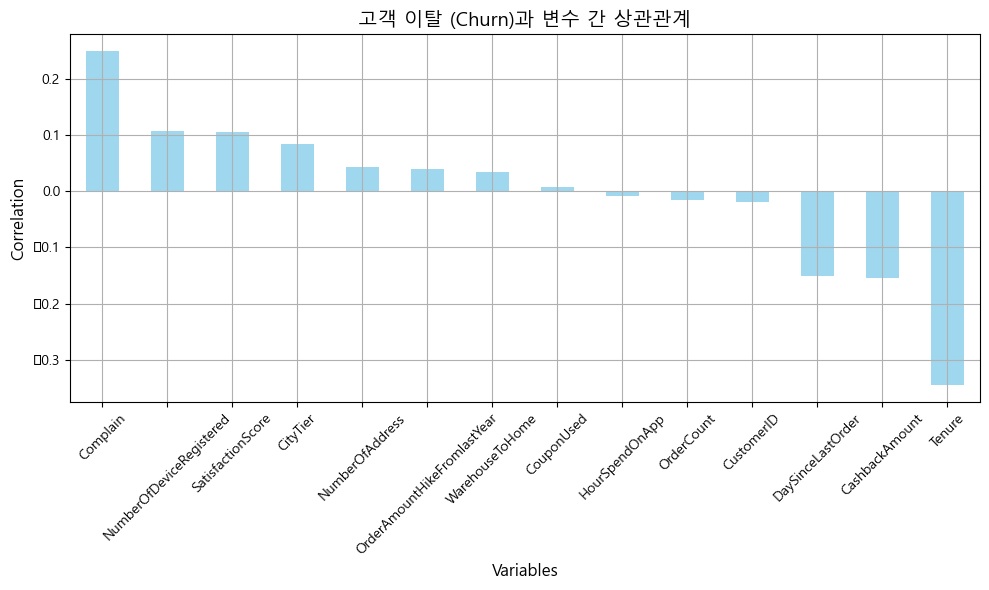

Complain                       0.250188
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
NumberOfAddress                0.043931
OrderAmountHikeFromlastYear    0.039369
WarehouseToHome                0.033889
CouponUsed                     0.007425
HourSpendOnApp                -0.008768
OrderCount                    -0.015327
CustomerID                    -0.019083
DaySinceLastOrder             -0.151303
CashbackAmount                -0.154161
Tenure                        -0.345374
Name: Churn, dtype: float64


In [21]:
# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# Replace missing values with 0
data.fillna(0, inplace=True)

# Churn (고객 이탈)과 다른 변수 간의 상관계수 계산
correlation_with_churn = data.corr()['Churn'].sort_values(ascending=False)

# Churn과 상관관계가 높은 변수 추출
top_correlation = correlation_with_churn[1:]  # Churn 자기 자신 제외

# 상위 변수 시각화
plt.figure(figsize=(10, 6))
top_correlation.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("고객 이탈 (Churn)과 변수 간 상관관계", fontsize=14)
plt.ylabel("Correlation", fontsize=12)
plt.xlabel("Variables", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print(top_correlation)

고객 이탈(`Churn`)과 다른 변수 간의 상관관계 분석 결과를 제공했습니다. 주요 변수와 상관관계 분석 결과는 다음과 같습니다:

### 주요 변수와 상관관계
1. **Complain** (불만 제기 여부): **0.250**
   - 고객 이탈과 가장 강한 상관관계를 보이는 변수로, 불만을 제기한 고객일수록 이탈 가능성이 높습니다.
   
2. **NumberOfDeviceRegistered** (등록된 기기 수): **0.108**
   - 등록된 기기 수가 많은 고객은 이탈 가능성이 약간 더 높습니다.
   
3. **SatisfactionScore** (만족도 점수): **0.105**
   - 만족도가 높은 고객은 이탈 가능성이 낮은 경향을 보입니다. 낮은 상관관계지만 중요한 변수로 분석될 수 있습니다.
   
4. **CityTier** (도시 등급): **0.085**
   - 도시 등급이 높은 고객일수록 이탈 가능성이 약간 높습니다.
   
5. **NumberOfAddress** (주소 수): **0.044**
   - 주소 수가 많을수록 고객 이탈과 약한 양의 상관관계를 보입니다.

### 인사이트 및 제안
- **Complain**: 불만 제기 고객을 대상으로 즉각적인 고객 만족 조치를 취함으로써 이탈률을 줄일 수 있습니다.
- **SatisfactionScore**: 만족도를 높이는 전략(예: 맞춤형 서비스)을 통해 고객 유지율을 향상시킬 수 있습니다.
- **CityTier**: 도시 등급별로 맞춤형 캠페인을 기획하여 이탈 가능성을 낮출 필요가 있습니다.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\4073687859.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr()[['Churn']].sort_values(by='Churn', ascending=False),
c:\Users\Admin\miniconda3\envs\kpmg\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\Admin\miniconda3\envs\kpmg\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


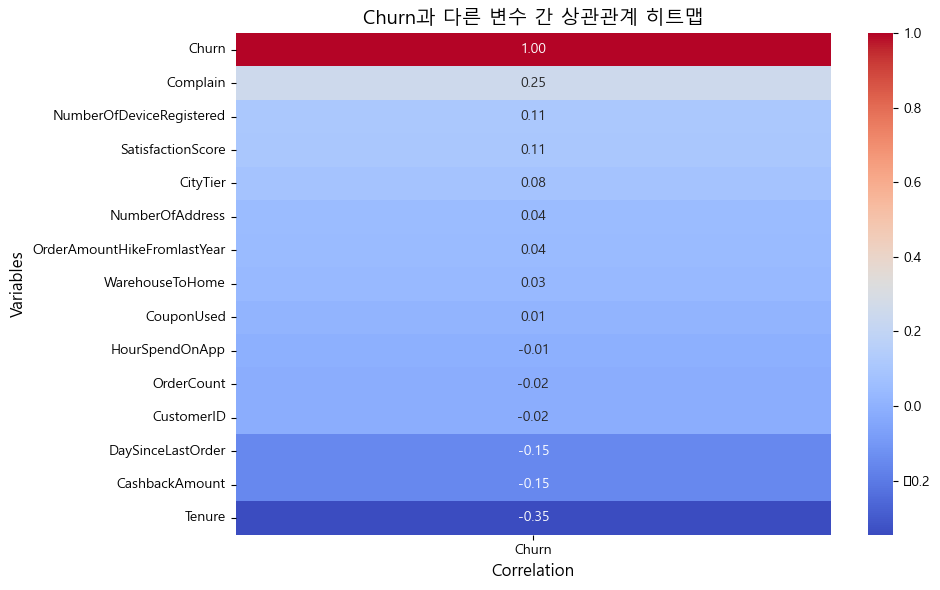

In [22]:
# 히트맵으로 상관관계 확인
# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# Replace missing values with 0
data.fillna(0, inplace=True)

# Churn과 다른 변수들 간의 상관계수 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr()[['Churn']].sort_values(by='Churn', ascending=False), 
            annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Churn과 다른 변수 간 상관관계 히트맵", fontsize=14)
plt.ylabel("Variables", fontsize=12)
plt.xlabel("Correlation", fontsize=12)
plt.tight_layout()
plt.show()


### 주요 결과
- **Complain** (불만 제기 여부): 고객 이탈과 가장 높은 양의 상관관계.
- **SatisfactionScore** (만족도 점수): 만족도가 낮을수록 이탈 가능성이 높아지는 경향.
- **CityTier** (도시 등급): 도시 환경에 따라 고객 이탈률이 다를 가능성.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\1581355525.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_5_variables = data.corr()['Churn'].sort_values(ascending=False).index[1:6]
C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\1581355525.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=column, data=data, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\1581355525.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=column, data=data, palette='Set2')
C:\Users\

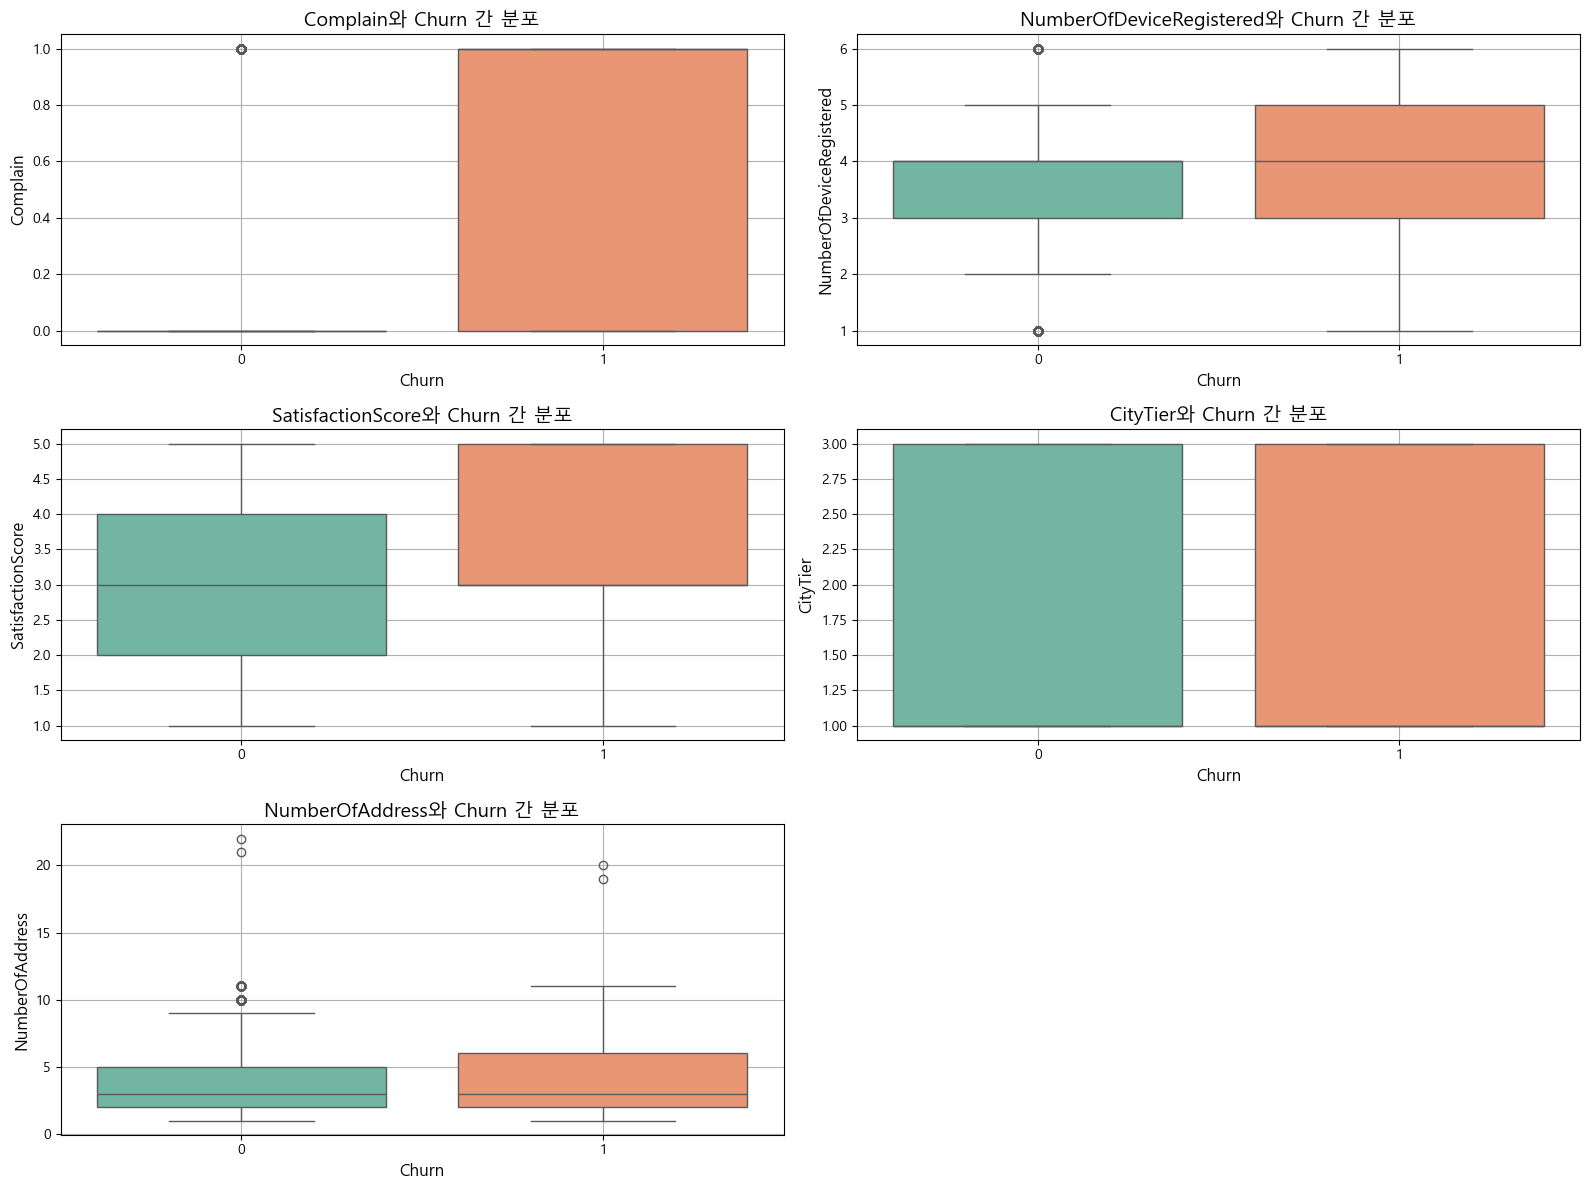

In [23]:
# 고객 이탈(Churn)과 상관관게 높은 상위 5개 변수와의 분포
plt.rcParams['font.family'] = 'Malgun Gothic'

# Replace missing values with 0
data.fillna(0, inplace=True)

# 상관관계가 높은 상위 5개 변수 추출
top_5_variables = data.corr()['Churn'].sort_values(ascending=False).index[1:6]

# 상위 5개 변수와 Churn 간 분포 시각화
plt.figure(figsize=(16, 12))

for i, column in enumerate(top_5_variables, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Churn', y=column, data=data, palette='Set2')
    plt.title(f"{column}와 Churn 간 분포", fontsize=14)
    plt.xlabel("Churn", fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()


### 시각화 분석
1. **각 변수와 Churn 간의 관계**:
   - **Complain**: 불만을 제기한 고객은 이탈률이 높습니다.
   - **SatisfactionScore**: 만족도가 낮은 고객일수록 이탈률이 높습니다.
   - 다른 변수들도 이탈 여부에 따른 분포 차이를 보이며, 고객 행동과 이탈률 간의 연관성을 시사합니다.

2. **인사이트 활용**:
   - 만족도를 높이고 불만을 해소하는 전략은 고객 이탈률을 줄이는 데 효과적입니다.
   - 상위 변수를 활용한 고객 분류 모델링 또는 추가 세그먼트 분석을 통해 더욱 세밀한 마케팅 전략을 수립할 수 있습니다.


C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\4234596299.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
c:\Users\Admin\miniconda3\envs\kpmg\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\Admin\miniconda3\envs\kpmg\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


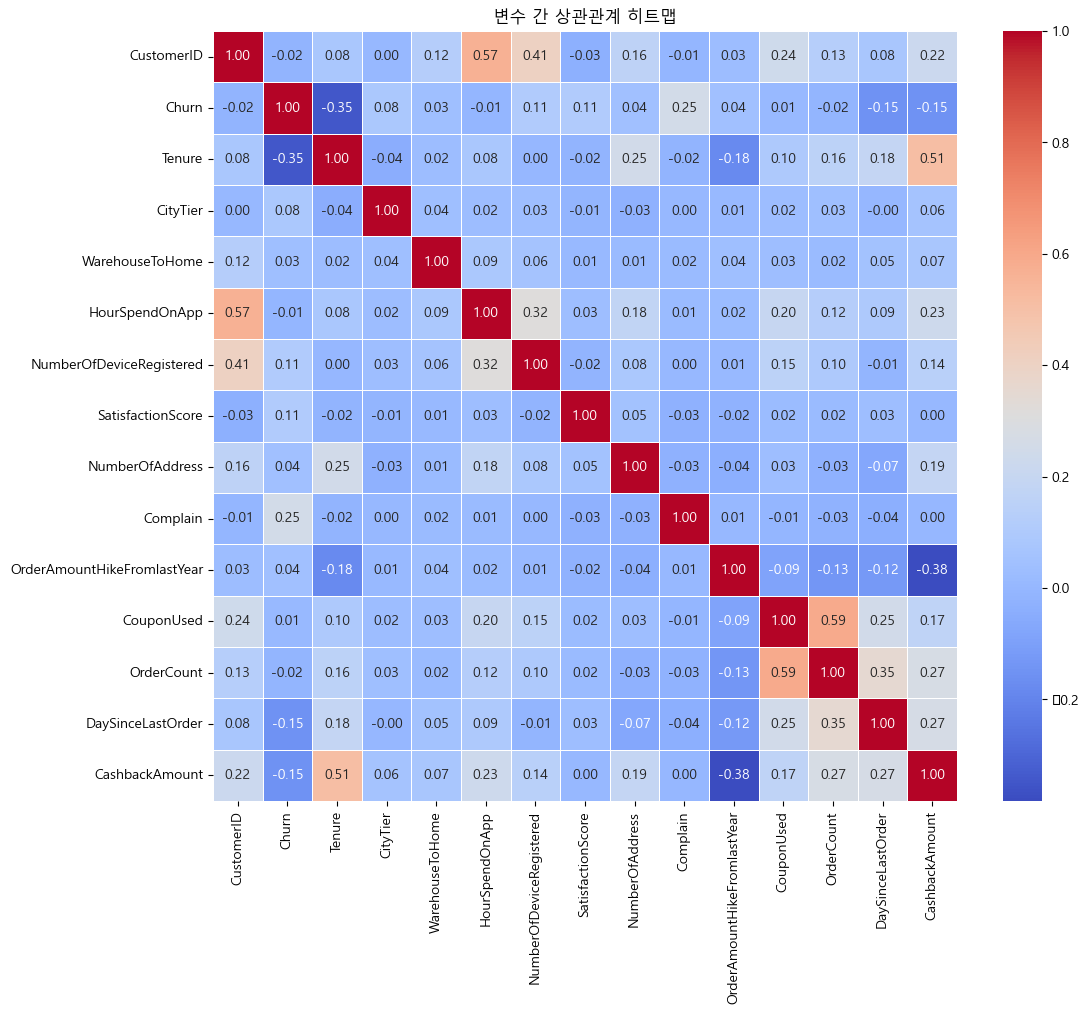

In [29]:
# 상관계수 히트맵
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("변수 간 상관관계 히트맵")
plt.show()


### **주요 상관관계**
1. **`Churn`과 다른 변수**
   - **Complain (0.25)**: 불만을 제기한 고객이 이탈할 가능성이 높음.
   - **SatisfactionScore (0.11)**: 만족도가 낮을수록 이탈 가능성이 증가.
   - **NumberOfDeviceRegistered (0.11)**: 등록된 기기가 많은 고객은 이탈 가능성이 약간 높음.

2. **변수 간 상관관계**
   - **CashbackAmount와 Tenure (0.51)**:
     - 캐시백 금액이 가입 기간과 높은 상관성을 가집니다. 이는 장기 고객에게 더 많은 혜택이 제공되었을 가능성을 시사합니다.
   - **CouponUsed와 OrderCount (0.59)**:
     - 쿠폰 사용과 주문 횟수 간의 강한 상관관계가 확인됩니다. 프로모션이 고객 행동에 영향을 미친 것으로 보입니다.

---

### **추가적으로 확인해야 할 부분**
1. **다중공선성 (Multicollinearity) 문제**
   - `CashbackAmount`와 `Tenure` 또는 `CouponUsed`와 `OrderCount` 간의 높은 상관관계는 모델링 시 다중공선성 문제를 유발할 수 있습니다.
   - 이를 해결하기 위해 변수 제거 또는 PCA(주성분 분석)와 같은 차원 축소 기법을 고려해야 합니다.

---

2. **특정 변수 간의 상관관계 해석**
   - `Complain`과 `Churn`의 관계를 세부적으로 분석하여 불만 제기가 이탈로 이어지는 패턴을 확인.
   - **Python 코드**:
     ```python
     sns.boxplot(x='Complain', y='Churn', data=data, palette='Set2')
     plt.title("Complain과 Churn 간의 관계")
     plt.xlabel("Complain")
     plt.ylabel("Churn")
     plt.show()
     ```

3. **상관관계가 낮은 변수 제거**
   - `WarehouseToHome`, `HourSpendOnApp` 등 `Churn`과 상관관계가 매우 낮은 변수는 분석 및 모델링에서 제외 가능.

---

### **분석 방향**
- 상관관계가 높은 변수는 모델에 중요한 특징으로 포함.
- 다중공선성 문제를 처리한 후 전처리 진행.
- 불만 제기 고객 및 쿠폰 사용자의 행동 분석을 기반으로 맞춤형 마케팅 전략 수립.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성 확인 함수
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

# 다중공선성 계산
features = ['CashbackAmount', 'Tenure', 'CouponUsed', 'OrderCount']
vif_results = calculate_vif(data, features)
print(vif_results)


          Feature       VIF
0  CashbackAmount  4.136373
1          Tenure  2.923480
2      CouponUsed  2.716167
3      OrderCount  3.142687


### **다중공선성 분석 결과**
VIF(Variance Inflation Factor) 값은 다중공선성을 확인하는 지표로, 특정 변수가 다른 변수들과 얼마나 상관관계가 높은지를 나타냅니다.

#### **해석**
1. **CashbackAmount (VIF: 4.14)**:
   - 상대적으로 높은 VIF 값을 가지고 있으며, 다른 변수(`Tenure`, `CouponUsed`)와의 상관관계가 클 가능성이 있습니다.
   - VIF가 5 이하이므로 모델에 포함 가능하나, 높은 상관성을 고려하여 주의가 필요합니다.

2. **Tenure (VIF: 2.92)**:
   - 가입 기간과 다른 변수들 간의 상관관계는 중간 수준으로, 다중공선성 문제는 크지 않음.

3. **CouponUsed (VIF: 2.72)**:
   - 쿠폰 사용과 관련된 변수는 다중공선성 문제가 거의 없으며, 분석에 포함 가능.

4. **OrderCount (VIF: 3.14)**:
   - 주문 횟수와 다른 변수 간 상관성이 존재하지만, VIF가 5 이하이므로 큰 문제가 되지 않음.

---

### **분석 및 처리 방향**
- **CashbackAmount**: 높은 VIF 값이 나타났으므로 모델링 전에 PCA(주성분 분석)를 사용하여 차원 축소를 고려하거나, 변수 제거 여부를 검토.
- **Tenure, CouponUsed, OrderCount**: 다중공선성 문제가 크지 않아 모델에 포함해도 무방.

In [31]:
# 이전 단계에서 탐지한 이상치가 모델링에 영향을 미치는지 확인
# IQR 이상치 제거 예제 (OrderCount 변수)
Q1 = data['OrderCount'].quantile(0.25)
Q3 = data['OrderCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거 후 데이터 분포 확인
data_no_outliers = data[(data['OrderCount'] >= lower_bound) & (data['OrderCount'] <= upper_bound)]
print(f"이상치 제거 전 데이터 크기: {data.shape}")
print(f"이상치 제거 후 데이터 크기: {data_no_outliers.shape}")


이상치 제거 전 데이터 크기: (5630, 20)
이상치 제거 후 데이터 크기: (4927, 20)


### **이상치 제거 결과 분석**
- **제거 전 데이터 크기**: 5630행, 20열
- **제거 후 데이터 크기**: 4927행, 20열
- **총 제거된 이상치**: \( 5630 - 4927 = 703 \) 행

---

### **분석**
1. **이상치 제거 비율**:
   - 약 \( \frac{703}{5630} \times 100 \approx 12.5\% \)의 데이터가 이상치로 분류되어 제거되었습니다.
   - 이상치 제거로 인해 데이터의 크기가 약간 줄어들었으나, 전체 데이터의 87.5%는 유지되었습니다.

2. **영향**:
   - 제거된 이상치가 분석 결과와 모델링에 큰 영향을 미칠 가능성을 고려해야 합니다.
   - 특히, 중요한 클래스(예: `Churn=1`)에 속한 데이터가 과도하게 제거되지 않았는지 확인이 필요합니다.

---

### **추가 확인 작업**
#### 1. 제거된 이상치의 `Churn` 분포
이상치로 제거된 데이터에서 `Churn` 변수의 분포를 확인하여, 주요 클래스가 과도하게 손실되지 않았는지 점검.

```python
# 이상치 제거된 데이터 확인
outliers_removed = data[~data.index.isin(data_no_outliers.index)]

# Churn 분포 확인
print(outliers_removed['Churn'].value_counts())
```

#### 2. 제거 전후 주요 변수 비교
제거된 이상치 데이터와 유지된 데이터 간 주요 변수(예: `Churn`, `CashbackAmount`)의 분포를 비교하여 데이터 왜곡 여부를 확인.

```python
# 분포 비교 (예: CashbackAmount)
plt.figure(figsize=(8, 6))
sns.kdeplot(data['CashbackAmount'], label='전체 데이터', color='blue')
sns.kdeplot(data_no_outliers['CashbackAmount'], label='이상치 제거 후', color='green')
plt.title("CashbackAmount 분포 비교")
plt.legend()
plt.grid(True)
plt.show()
```

#### 3. 제거된 이상치의 영향 분석
이상치 제거 후 주요 변수와 `Churn` 간 상관관계 변화 여부를 확인.

```python
# 상관관계 비교
print("이상치 제거 전 상관관계:")
print(data.corr()['Churn'].sort_values(ascending=False))

print("이상치 제거 후 상관관계:")
print(data_no_outliers.corr()['Churn'].sort_values(ascending=False))
```

---

### **제안된 방향**
- 이상치 제거가 모델 성능에 긍정적인 영향을 미칠 가능성이 높지만, 중요 클래스 데이터 손실 여부를 반드시 확인해야 합니다.
- 추가 분석 또는 확인 작업을 통해 이상치 제거 후의 데이터 품질을 점검할 것을 권장합니다.

In [33]:
# 범주형 변수 확인
# 범주형 변수에 고유값이 많거나, 적합하지 않은 형식이 있는지 확인. 이후 인코딩을 위한 준비
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = data[col].nunique()
    print(f"{col} 변수의 고유값 개수: {unique_values}")
    print(data[col].value_counts())
    print("\n")


PreferredLoginDevice 변수의 고유값 개수: 3
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode 변수의 고유값 개수: 7
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender 변수의 고유값 개수: 2
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat 변수의 고유값 개수: 6
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus 변수의 고유값 개수: 3
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




**범주형 변수의 고유값 및 분포**
---

### **범주형 변수 분석**

#### 1. **`PreferredLoginDevice` (선호 로그인 장치)**:
   - **고유값**: 3개 (`Mobile Phone`, `Computer`, `Phone`)
   - **특성**:
     - **Mobile Phone** 사용자가 가장 많음 (2765명).
     - 컴퓨터(1634명)와 일반 전화기(1231명)의 사용 비율이 낮음.
   - **활용**:
     - 로그인 장치별 사용자 경험 분석.
     - 모바일 중심의 고객 전략 강화.

#### 2. **`PreferredPaymentMode` (선호 결제 방식)**:
   - **고유값**: 7개 (`Debit Card`, `Credit Card`, `E wallet`, `UPI`, `COD`, `CC`, `Cash on Delivery`)
   - **특성**:
     - `Debit Card`가 가장 많이 사용(2314명).
     - `Cash on Delivery`는 매우 적은 고객(149명).
   - **활용**:
     - 특정 결제 방식 사용자 타겟팅.
     - 비인기 결제 방식의 사용성을 개선하거나 제외 가능.

#### 3. **`Gender` (성별)**:
   - **고유값**: 2개 (`Male`, `Female`)
   - **특성**:
     - 남성이 여성보다 약간 많음 (3384명 대 2246명).
   - **활용**:
     - 성별에 따른 선호 행동 패턴 분석.
     - 성별 맞춤형 마케팅.

#### 4. **`PreferedOrderCat` (선호 주문 카테고리)**:
   - **고유값**: 6개
   - **특성**:
     - 주문 카테고리가 다양하며, 특정 카테고리 선호도가 높을 가능성.
   - **활용**:
     - 카테고리별 매출 기여도 분석.
     - 인기 카테고리에 추가 프로모션 적용.

#### 5. **`MaritalStatus` (결혼 여부)**:
   - **고유값**: 2개 (`Married`, `Divorced`)
   - **특성**:
     - 결혼 여부가 고객 행동에 미치는 영향이 있을 가능성.
   - **활용**:
     - 기혼자와 이혼자의 행동 차이를 분석해 맞춤 전략 수립.

---

### **추가 전처리 작업**
1. **인코딩 필요성**:
   - 범주형 변수를 모델 학습에 사용하려면 수치형으로 변환 필요.
   - **One-Hot Encoding** 또는 **Label Encoding** 활용.

#### Python 코드:
```python
# One-Hot Encoding 예제
encoded_data = pd.get_dummies(data, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 
                                             'Gender', 'PreferedOrderCat', 'MaritalStatus'])

print("One-Hot Encoding 완료 후 데이터 크기:", encoded_data.shape)
```

2. **범주형 변수와 `Churn` 간 관계 분석**:
   - 각 범주형 변수와 고객 이탈 간의 관계를 탐색하여 유의미한 패턴 발견.

#### Python 코드:
```python
# 범주형 변수와 Churn의 관계 시각화 (예: PreferredLoginDevice)
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=data, palette='Set2')
plt.title("PreferredLoginDevice와 Churn 간의 관계")
plt.xlabel("PreferredLoginDevice")
plt.ylabel("Count")
plt.show()
```

3. **고유값이 적은 변수 제거 여부 검토**:
   - `Cash on Delivery`와 같은 비인기 값은 데이터의 다양성에 크게 기여하지 않으므로 제거 가능.